<a href="https://colab.research.google.com/github/mofuoku417/Multivariate-Time-Series-Forecasting-of-Crude-Palm-Oil-Price-Using-Machine-Learning-Techniques/blob/main/MLP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [50]:
#To compute Mean Directional Accuracy
def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

#Calculate the root mean squared error:
def RMSE(y_true, y_pred): 
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

#Calculate the mean absolute percentage error
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
    return mape

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
#reading the csv file into pandas data frame
df = pd.read_csv("/content/gdrive/MyDrive/raw_data/df3.csv")

In [29]:
del df['Unnamed: 0']

In [32]:
df.columns = ['Date', 'cpo_pri', 'cno_pri', 'sbo_pri', 'pno_pri']

In [33]:
#setting the Date column as the index of the data frame
df['Date'] = df['Date'].apply(pd.to_datetime)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8925d1d1d0>,
      dtype=object)

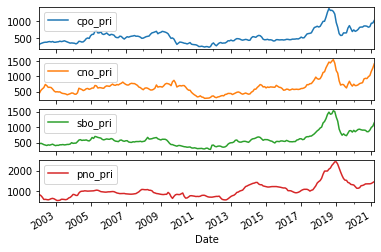

In [34]:
df.set_index('Date')[['cpo_pri', 'cno_pri','sbo_pri', 'pno_pri']].plot(subplots=True)

In [42]:
X = df[['cno_pri','sbo_pri', 'pno_pri']]
y = df['cpo_pri']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [45]:
pipe_MLPRegressor = Pipeline([('scaler',  MinMaxScaler()),
            ('MLPRegressor', MLPRegressor(random_state = 42))])
grid_params_MLPRegressor = [{
    'MLPRegressor__solver': ['lbfgs','sgd', 'adam'],
    'MLPRegressor__max_iter': [100,200,300,500, 1000],
    'MLPRegressor__activation' : ['relu','logistic','tanh'],
    'MLPRegressor__hidden_layer_sizes':[(2,), (4,),(2,2),(4,4),(4,2),(10,10),(2,
2,2)],}]


CV_mlpregressor = GridSearchCV (estimator = pipe_MLPRegressor,
                               param_grid = grid_params_MLPRegressor,
                               cv = 5,return_train_score=True, verbose=0)

CV_mlpregressor.fit(X_train, y_train)

ypred=CV_mlpregressor.predict(X_test)

print (np.c_[y_test, ypred])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[ 443.          440.7695523 ]
 [1293.         1382.2263354 ]
 [ 323.          328.87221086]
 [ 661.          671.7243142 ]
 [ 466.          441.43328622]
 [ 388.          408.40331893]
 [ 725.          803.57531377]
 [ 566.          532.10348917]
 [ 830.          811.43609744]
 [ 467.          475.7804508 ]
 [ 515.          487.30162292]
 [ 265.          273.07373409]
 [ 567.          533.49918403]
 [ 390.          456.15920427]
 [ 426.          424.75977815]
 [ 454.          428.84607813]
 [ 332.          359.62505155]
 [ 382.          458.4166674 ]
 [ 611.          531.8004985 ]
 [ 446.          459.98588257]
 [ 499.          552.89908391]
 [ 288.          268.63089073]
 [ 659.          635.93314897]
 [ 873.          779.79681596]
 [ 255.          270.58050461]
 [ 561.          518.08627465]
 [ 471.          482.11008811]
 [ 616.          566.06716919]
 [ 391.          422.30814069]
 [ 439.          413.2553728 ]
 [ 511.          514.98551096]
 [ 486.          449.58912917]
 [ 855. 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [52]:
MAE_mlp = mean_absolute_error(y_test, ypred)
print('MAE value of the MLP Model is:', MAE_mlp)

#MDA_mlp = mda(y_test, ypred)
#print('MDA value of the MLP Model is:', MDA_mlp)

MAPE_mlp = mean_absolute_percentage_error(y_test, ypred)
print('MAPE value of the MLP Model is:', (MAPE_mlp))

RMSE_mlp = mean_squared_error(y_test, ypred, squared=False)
print('RMSE value of the MLP Model is:', (RMSE_mlp))

MSE_mlp = mean_squared_error(y_test, ypred)
print('MSE value of the MLP Model is:', (MSE_mlp))

MAE value of the MLP Model is: 34.957648963972055
MAPE value of the MLP Model is: 6.409003520490791
RMSE value of the MLP Model is: 46.116857212602675
MSE value of the MLP Model is: 2126.7645191675833
